In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df_omx = pd.read_csv('OMX Stockholm 30 Historical Data.csv')
#df_omx = pd.read_csv('EVOG Historical Data.csv')

df_omx['Date'] = pd.to_datetime(df_omx['Date'], format = '%m/%d/%Y')
cols = ['Price', 'Open','High','Low','Vol.']
df_omx['Price'] = df_omx['Price'].str.replace(',', '').astype(float)
df_omx['Open'] = df_omx['Open'].str.replace(',', '').astype(float)
df_omx.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-11-09,2033.12,2031.03,"2,035.07","2,018.34",143.86M,-0.14%
1,2022-11-08,2035.99,2005.03,"2,039.04","2,002.36",125.29M,1.36%
2,2022-11-07,2008.62,1990.09,"2,014.33","1,988.25",120.82M,0.48%
3,2022-11-04,1999.01,1967.43,"1,999.02","1,966.28",82.24M,1.99%
4,2022-11-03,1960.06,1965.65,"1,965.65","1,945.39",150.30M,-1.03%


In [4]:
n = 60

df_hurst = df_omx.set_index('Date').sort_index()['Price'].rename('price').to_frame()

df_hurst['ri'] = df_hurst['price'].div(df_hurst['price'].shift(1)).apply(np.log)
df_hurst['Rin'] = df_hurst['price'].div(df_hurst['price'].shift(n)).apply(np.log)
df_hurst['Nin'] = df_hurst['ri'].abs().rolling(n).sum().div(df_hurst['Rin'].div(n).abs())
df_hurst['Din'] = df_hurst['Nin'].apply(np.log).div(np.log(n))



Date
2005-07-25    1.236961
2005-07-26    1.202077
2005-07-27    1.195686
2005-07-28    1.199942
2005-07-29    1.203786
                ...   
2021-03-23    1.241683
2021-03-24    1.236685
2021-03-26    1.249722
2021-03-29    1.244973
2021-03-30    1.245414
Name: Din, Length: 62, dtype: float64

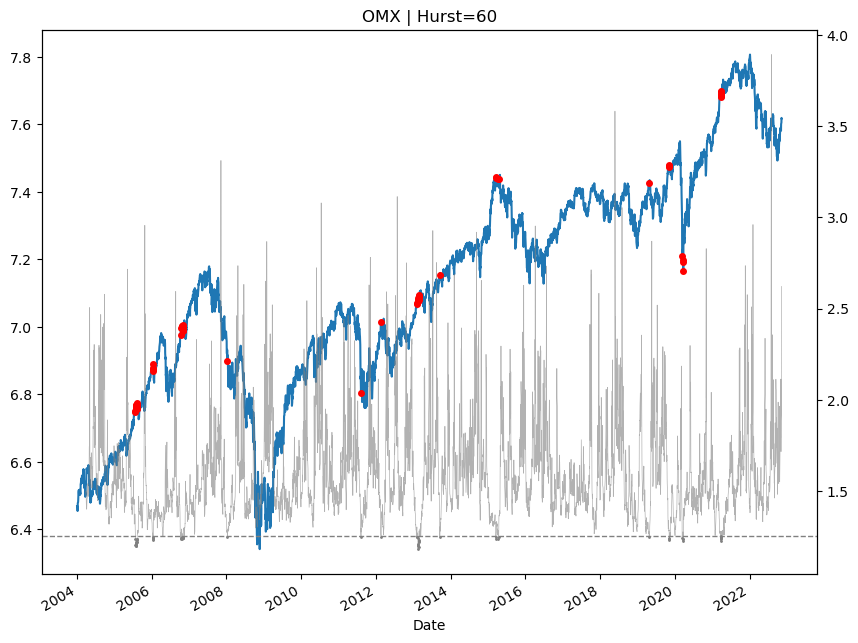

In [6]:
f, ax = plt.subplots(figsize=(10,8))

df_hurst['price'].apply(np.log).plot(ax=ax, kind='line')
df_hurst[df_hurst['Din']<1.25].apply(np.log)['price'].plot(ax=ax, ls='', marker='o', color='r', ms=4)

ax2 = ax.twinx()

df_hurst['Din'].plot(ax = ax2, color='grey', lw=0.5, alpha = 0.6, ls='-', title='OMX | Hurst=60')
df_hurst[df_hurst['Din']<1.25]['Din'].plot(ax = ax2, color='grey', lw=1, alpha = 1, ls='', marker='o', ms=1)
ax2.axhline(1.25, lw=1, ls='--', color='grey')

df_hurst[df_hurst['Din']<1.25]['Din']

In [ ]:
H, c, data = compute_Hc(serie, kind='price', simplified=True)

[[10, 17, 31, 56, 100, 177, 316, 562, 1000, 1222],
 [4.070671900089973,
  5.698537625281408,
  8.064200644701303,
  11.376746202216404,
  15.305226332205258,
  24.91486083240945,
  31.215545253924603,
  49.315323845798915,
  71.73476357799017,
  72.75172512308562]]

Date
2018-01-02    1579.82
2018-01-03    1587.56
2018-01-04    1603.67
2018-01-05    1611.31
2018-01-08    1619.13
               ...   
2022-11-03    1960.06
2022-11-04    1999.01
2022-11-07    2008.62
2022-11-08    2035.99
2022-11-09    2019.50
Name: Price, Length: 1222, dtype: float64